In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np


<AxesSubplot:xlabel='X', ylabel='Y'>

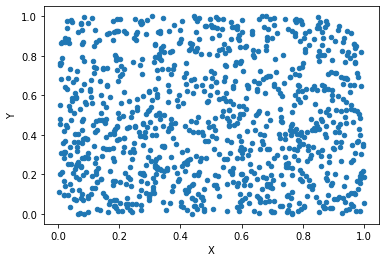

In [2]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy.X = X
df_xy.Y = Y
df_xy.plot(x="X",y = "Y",kind="scatter")

In [3]:

X = np.random.uniform(0,1,1000)
X

array([0.28617105, 0.3913999 , 0.8283105 , 0.40528891, 0.4597175 ,
       0.91445324, 0.40544351, 0.74005347, 0.49231426, 0.18483099,
       0.72792433, 0.68878645, 0.48867747, 0.74247428, 0.48577305,
       0.42405072, 0.93813309, 0.16719262, 0.42349188, 0.54185907,
       0.5819684 , 0.52020537, 0.93922833, 0.2214051 , 0.89408526,
       0.78118514, 0.77261482, 0.30297813, 0.66856835, 0.40033087,
       0.92992729, 0.25916044, 0.61706663, 0.89621517, 0.66276482,
       0.32944202, 0.71938416, 0.58974943, 0.98563668, 0.80196758,
       0.8454211 , 0.78233316, 0.00782545, 0.00298912, 0.46133683,
       0.48178119, 0.41891093, 0.53628259, 0.49697483, 0.75694659,
       0.33105298, 0.87410629, 0.75885667, 0.34504141, 0.38819202,
       0.10697261, 0.2012763 , 0.8524728 , 0.42680842, 0.65475874,
       0.78585975, 0.80206826, 0.94619983, 0.22637999, 0.387277  ,
       0.9583922 , 0.07381617, 0.42086461, 0.75264321, 0.42067347,
       0.01624478, 0.02447077, 0.30680862, 0.32674348, 0.83935

<AxesSubplot:xlabel='X', ylabel='Y'>

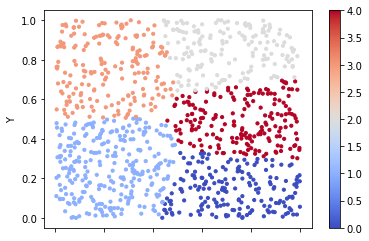

In [4]:
model1 = KMeans(n_clusters=5).fit(df_xy)

df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm)


In [5]:
Univ = pd.read_csv(r"C:\Users\lenovo\Desktop\DATA SCIENCE\Universities.csv")

In [6]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Univ.iloc[:,1:])


df_norm.head(10)  # Top 10 rows


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


In [7]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=5) 
model.fit(df_norm)

model.labels_ # getting the labels of clusters assigned to each row 

array([3, 2, 4, 0, 0, 3, 3, 0, 3, 2, 3, 0, 0, 1, 3, 1, 3, 1, 0, 0, 4, 0,
       0, 1, 3])

In [8]:
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
Univ['clust']=md # creating a  new column and assigning it to new column 
df_norm.head()


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


In [9]:
Univ.iloc[:,1:7].groupby(Univ.clust).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1266.666667,80.666667,36.888889,12.888889,23455.111111,88.888889
1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000
3,1356.875000,91.125000,21.500000,10.875000,33878.750000,94.500000
4,1220.000000,63.500000,63.500000,12.500000,20248.000000,78.500000
